In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('placement.csv')

In [ ]:
df.sample(5)

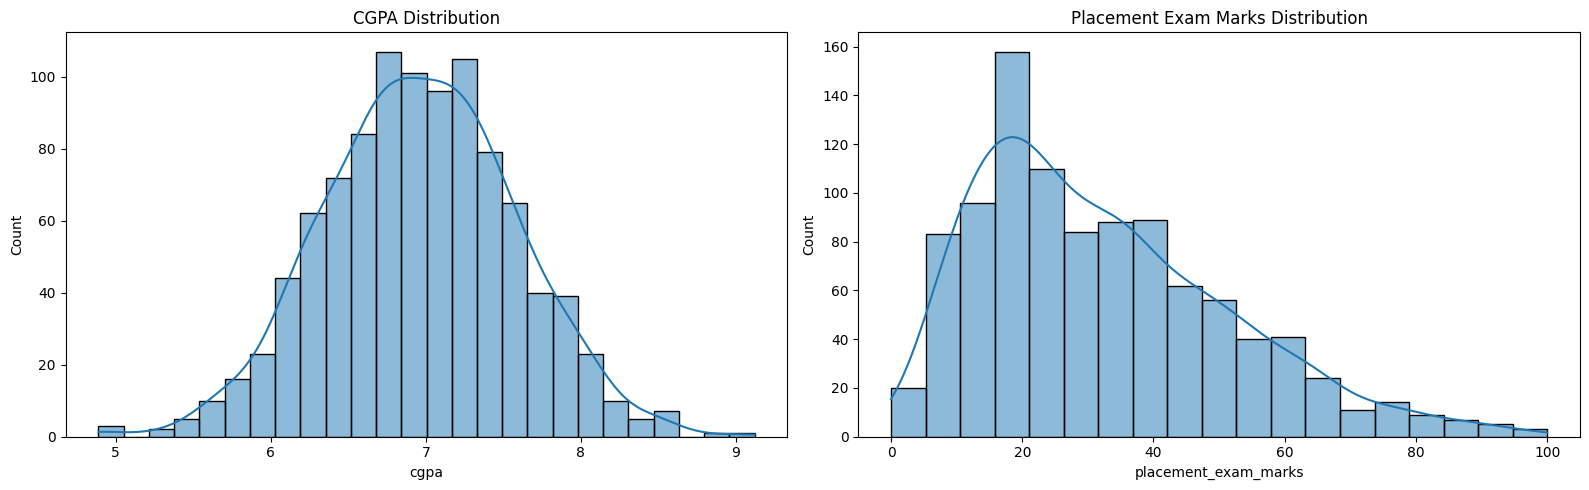

In [8]:
plt.figure(figsize=(16,5))
# Plot 1: CGPA distribution
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True)
plt.title('CGPA Distribution')

# Plot 2: Placement Exam Marks distribution
plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title('Placement Exam Marks Distribution')

plt.tight_layout()
plt.show()

In [9]:
print('mean of the cgpa',df['cgpa'].mean())
print('std of the cgpa',df['cgpa'].std())
print('min of the cgpa',df['cgpa'].min())
print('max of the cgpa',df['cgpa'].max())

mean of the cgpa 6.96124
std of the cgpa 0.6158978751323894
min of the cgpa 4.89
max of the cgpa 9.12


In [10]:
print('Higher allowed',df['cgpa'].mean()+3*df['cgpa'].std())
print('Lower allowed',df['cgpa'].mean()-3*df['cgpa'].std())

Higher allowed 8.808933625397168
Lower allowed 5.113546374602832


In [11]:
#ifinding outlier
df_new=df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]

In [14]:
#calculating the Zscore
df['cgpa_zscore'] =(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [12]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [15]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [16]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [17]:
df[(df['cgpa_zscore']>3)|(df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [18]:
new_df=df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]

In [19]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [20]:
#Capping
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [21]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
       df['cgpa']<lower_limit,
       lower_limit,
       df['cgpa']
    )
)

In [23]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
